In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../../data/raw/raw_analyst_ratings.csv/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

# Article counts per publisher
article_counts = df['publisher'].value_counts()
print(article_counts)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

In [19]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis on headlines
df['sentiment'] = df['headline'].apply(get_sentiment)

# Display the sentiment distribution
print(df['sentiment'].describe())


count    55987.000000
mean         0.038009
std          0.155603
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment, dtype: float64


C:\Users\suraf\AppData\Local\Temp\ipykernel_2260\281042350.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['headline'].apply(get_sentiment)


C:\Users\suraf\AppData\Local\Temp\ipykernel_2260\728173121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\suraf\AppData\Local\Temp\ipykernel_2260\728173121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].dt.tz_localize(None)


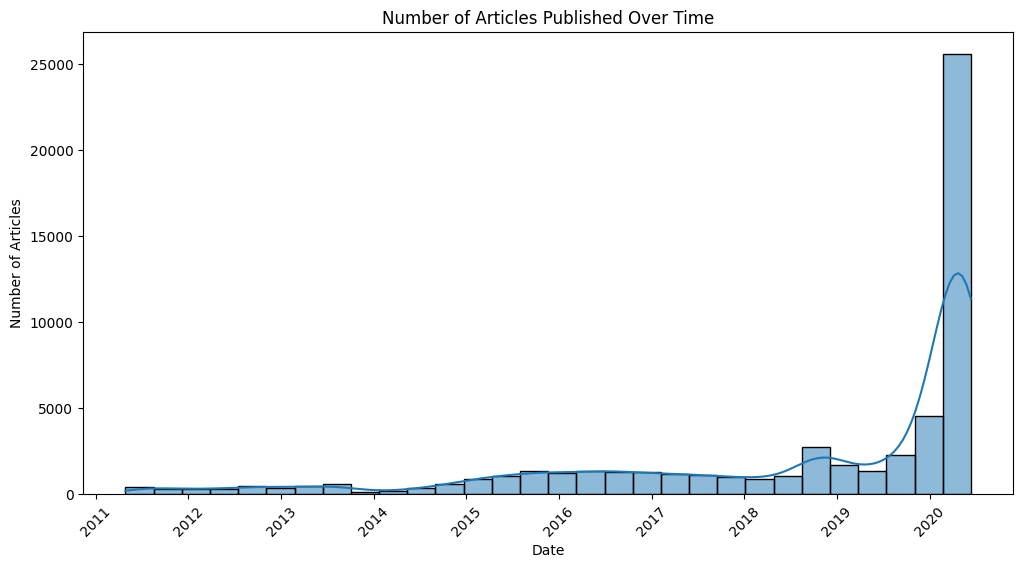

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime and handle errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for and handle missing or invalid dates
if df['date'].isna().sum() > 0:
    print(f"Invalid dates found: {df['date'].isna().sum()}")
    df = df.dropna(subset=['date'])  # Option to drop rows with invalid dates

# Remove timezone information
df['date'] = df['date'].dt.tz_localize(None)

# Plot publication frequency over time
plt.figure(figsize=(12, 6))
sns.histplot(df['date'], kde=True, bins=30)
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [28]:
import re

# Extract unique domains from publisher names
def extract_domain(publisher):
    match = re.search(r'@([a-zA-Z0-9.-]+)', publisher)
    if match:
        return match.group(1)
    return publisher

# Load the data
file_path = '../../data/raw/raw_analyst_ratings.csv/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Extract domain from publisher
df['publisher_domain'] = df['publisher'].apply(extract_domain)
publisher_domains = df['publisher_domain'].value_counts()

print(publisher_domains)


publisher_domain
Paul Quintaro         228373
Lisa Levin            186979
Benzinga Newsdesk     150484
Charles Gross          96732
Monica Gerson          82380
                       ...  
Paul Dykewicz              1
Anthony Cibotti            1
DavidBDurandMD             1
Lydia Idem Finkley         1
David A. Moore             1
Name: count, Length: 1024, dtype: int64
